###**Breast Cancer Prediction**

###**The Question**

Breast cancer is the most common type of cancer amongst women all over the world.

In the early stages of breast cancer, the breast cells grow out of control and form a tumor that are either detected through physical hard spots or in X-ray scans.

Sometimes the lumps on the breast are not cancerous (we call these benign tumors).

The key challange is to decide whether the tumor is cancerous (malignant) or not.

----------------------------------------------------------------------------

###**Why Bother**?

We wanted to work on a project where we implement AI in medical science.

Cancer is one of the major disease that can be both genetic or non-genetic. and among all the cancer types the breast cancer is the most common one with 290,560 new cases expected in the United States in 2022 (source: google). So we decided to explore more options in this area. 

-----------------------------------------------------------------------------

###**The Data**

We first started working with the breast cancer gene data available at Kaggle https://www.kaggle.com/code/varshinipj/breast-cancer-gene-data but it was slightly limiting. This dataset didn't serve our classification needs and as a result we changed the dataset and chose to work using a different breast cancer dataset https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset available on kaggle.  

The datasets has the fields related to the structure of the tumor including parameters such as perimeter, compactness, texture, etc.

Based on the structure and growth of the lump the nature of the tumor can be determined.

The target column in the data is "diagnosis"; all others are features.

<img src="https://www.verywellhealth.com/thmb/V4VdxdpWe0V1KY871SPrfw6kRqo=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/514240-article-img-malignant-vs-benign-tumor2111891f-54cc-47aa-8967-4cd5411fdb2f-5a2848f122fa3a0037c544be.png" width="50%"/>

source: https://www.verywellhealth.com/thmb/V4VdxdpWe0V1KY871SPrfw6kRqo=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/514240-article-img-malignant-vs-benign-tumor2111891f-54cc-47aa-8967-4cd5411fdb2f-5a2848f122fa3a0037c544be.png


The image shows the types of tumors based on their structure (benign or malignant).

We used the structure of the lumps as feature to predict whether the tumor is of type M (malignant) or type B (benign).


------------------------------------------------------------------------------
###**The Approach**

We first wanted to take a look at the data and see if we could find any patterns or clusters amongst the different features. From there, we decided to try various different classifiers to see which ones best suits our needs.

------------------------------------------------------------------------------

###**Our hypothesis**


considering Overall performance Random Forest Classifier performs better with more categorical data 
logistic regression is a little confusing when comes to categorical data. 

We are expeciting random forest to work better




In [ ]:
# Import all necessary packages
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score

from sklearn.linear_model import LogisticRegression

In [ ]:
# Open dataset and remove any empty or null entries in the dataset
df = pd.read_csv('/content/sample_data/breast-cancer.csv')

In [ ]:
# Simple printout of our datatable
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Check to see if there are any null entries in our dataset that we should prune
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

###**The Approach**


We first wanted to take a look at the data and see if we  could find any patterns or clusters amongst the different features. From there, we decided to try various different classifiers to see which ones best suits our needs.

-----------------------------------------------------------------------------

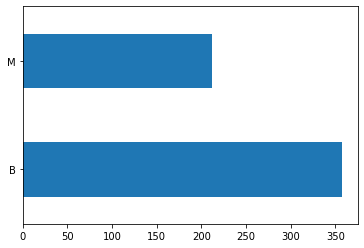

In [ ]:
df['diagnosis'].value_counts()[:20].plot(kind='barh')

In [ ]:
# Label malignant as 0 and benign as 1
encoder = preprocessing.LabelEncoder()
encoder.fit(df['diagnosis'])
df['diagnosis'] = encoder.transform(df['diagnosis'])

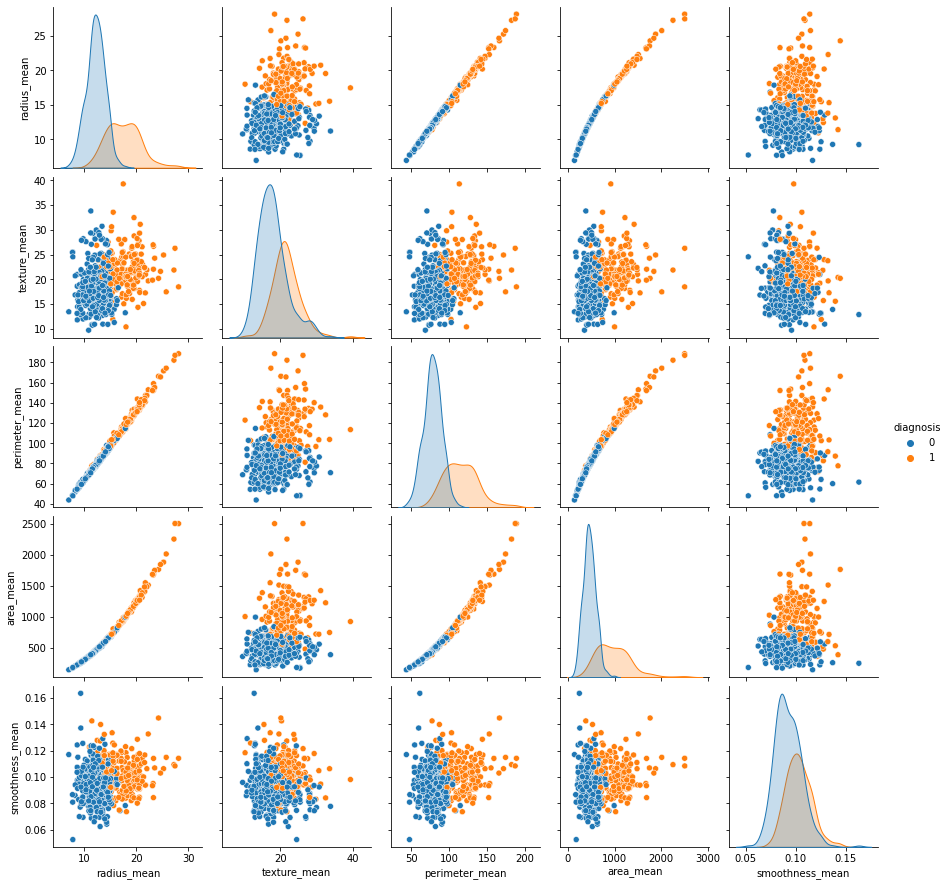

In [ ]:
sns.pairplot(df, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean"])

For our primary data exploration, we graphed the means of various information relating to the lumps. From there, it showed that the data was linearly separable for an extent, but not completely separable. That's why we decided against using a linear regression model, and decided that using a logistic regression model would be a better way to start off the problem, because it's more flexible as a classifier. 




In [ ]:
X, Y = df[['radius_mean','texture_mean','perimeter_mean',"area_mean", "smoothness_mean"]], df['diagnosis']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

Here we are evaluating the performance of the model using the accuracy report and the precision report based on the model. Then, we added a KFold method to see if our model provides sound predictions for unknown data values. We want to ensure that we aren't getting lucky with certain folds of the data so we used 5 folds for verification.

In [ ]:
Y_pred=model.predict(X_test)
print('Accuracy:',accuracy_score(Y_test,Y_pred))
print('Precision:',precision_score(Y_test,Y_pred))
print('Classification Report:\n',classification_report(Y_test,Y_pred))

Accuracy: 0.8947368421052632
Precision: 0.8985507246376812
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        98
           1       0.90      0.85      0.87        73

    accuracy                           0.89       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.89      0.89      0.89       171



In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
kf = KFold(n_splits=5, random_state=None, )
f1scores = []
for train_index, test_index in kf.split(X):
  X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
  Y_train , Y_test = Y[train_index] ,Y[test_index]
  model.fit(X_train,Y_train)
  pred_values = model.predict(X_test)
  f1sc = f1_score(Y_test, pred_values)
  f1scores.append(f1sc)
avg_score = sum(f1scores)/5

print('f1 score of each fold - {}'.format(f1scores))
print('Avg f1 score : {}'.format(avg_score))



However, when looking at all of the variables provided in the dataset, we realized that a lot of variables besides the initial 5 that we used that can be important in diagnosing malignant tumors. 


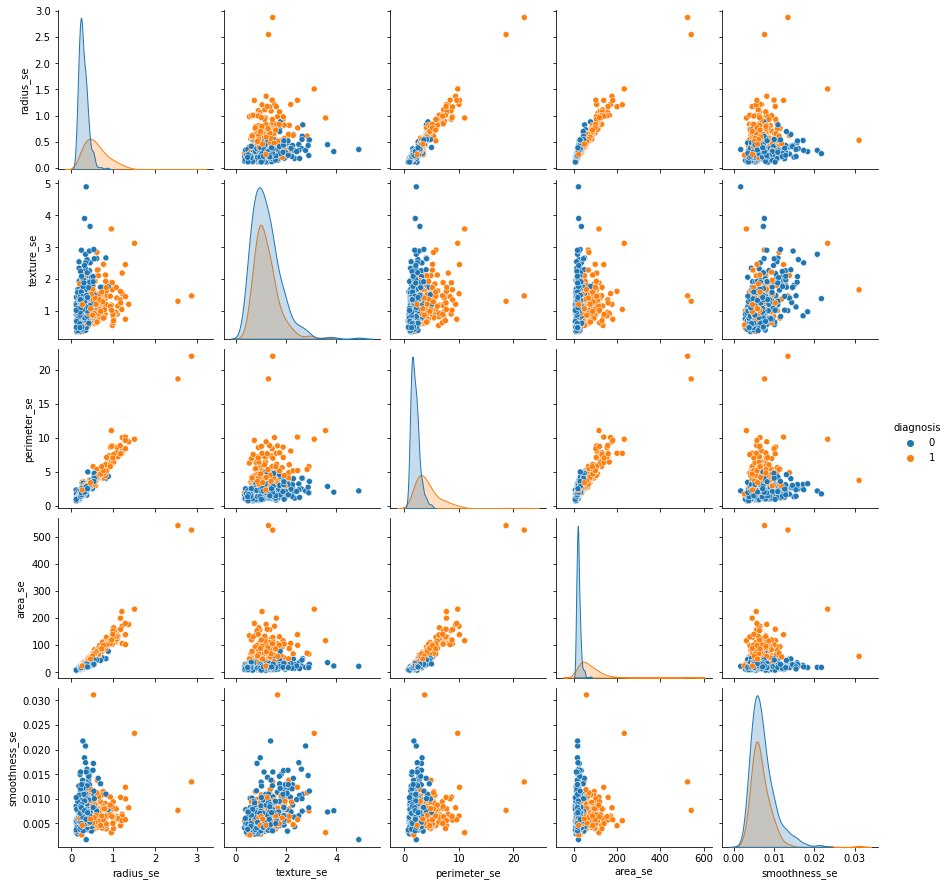

In [ ]:
sns.pairplot(df, hue="diagnosis", vars=["radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se"])

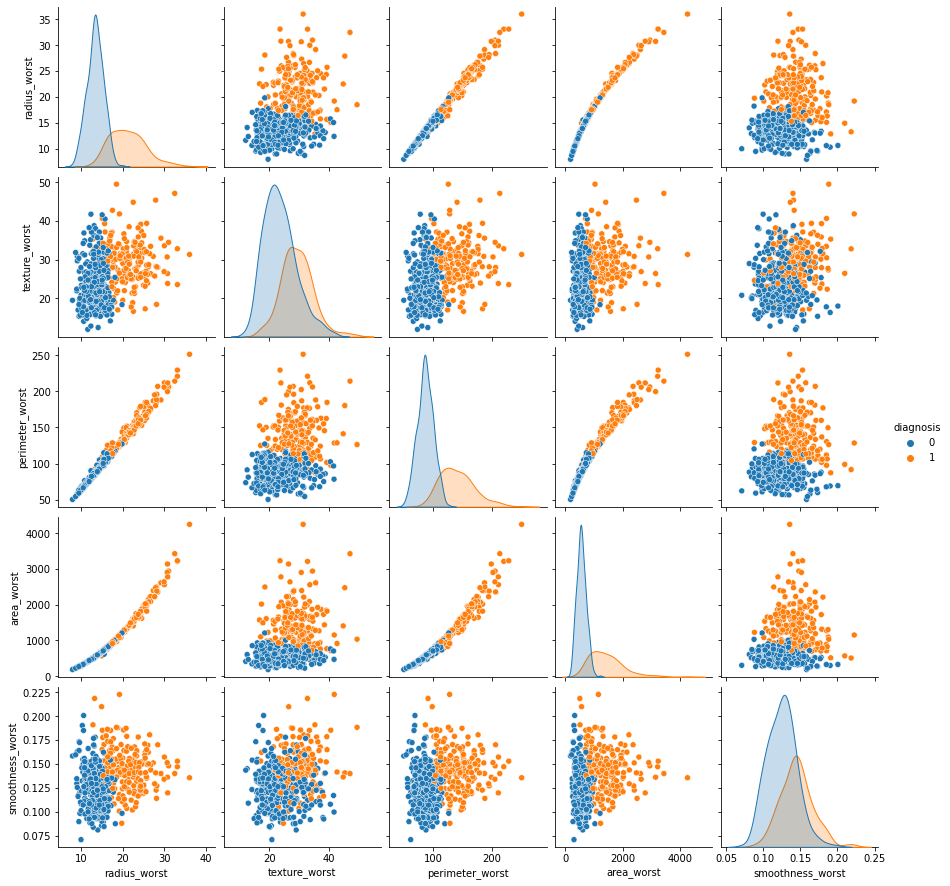

In [ ]:
sns.pairplot(df, hue="diagnosis", vars=["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst"])

###**Heatmap**



Heat maps are very convenient to use when understanding complex data sets. Heat map is a 2D representation of data in which values can be represented by different color schemes. 
Heatmaps are mainly used to find strong relationships between various parameters as they are a great indicator of correlation

darker the colour higher the correlation

As you can see radius mean and perimeter mean has correlation 1 that means those two paramters are highly correlated and texture mean and permiter worst has -0.2 that means they are not correlated



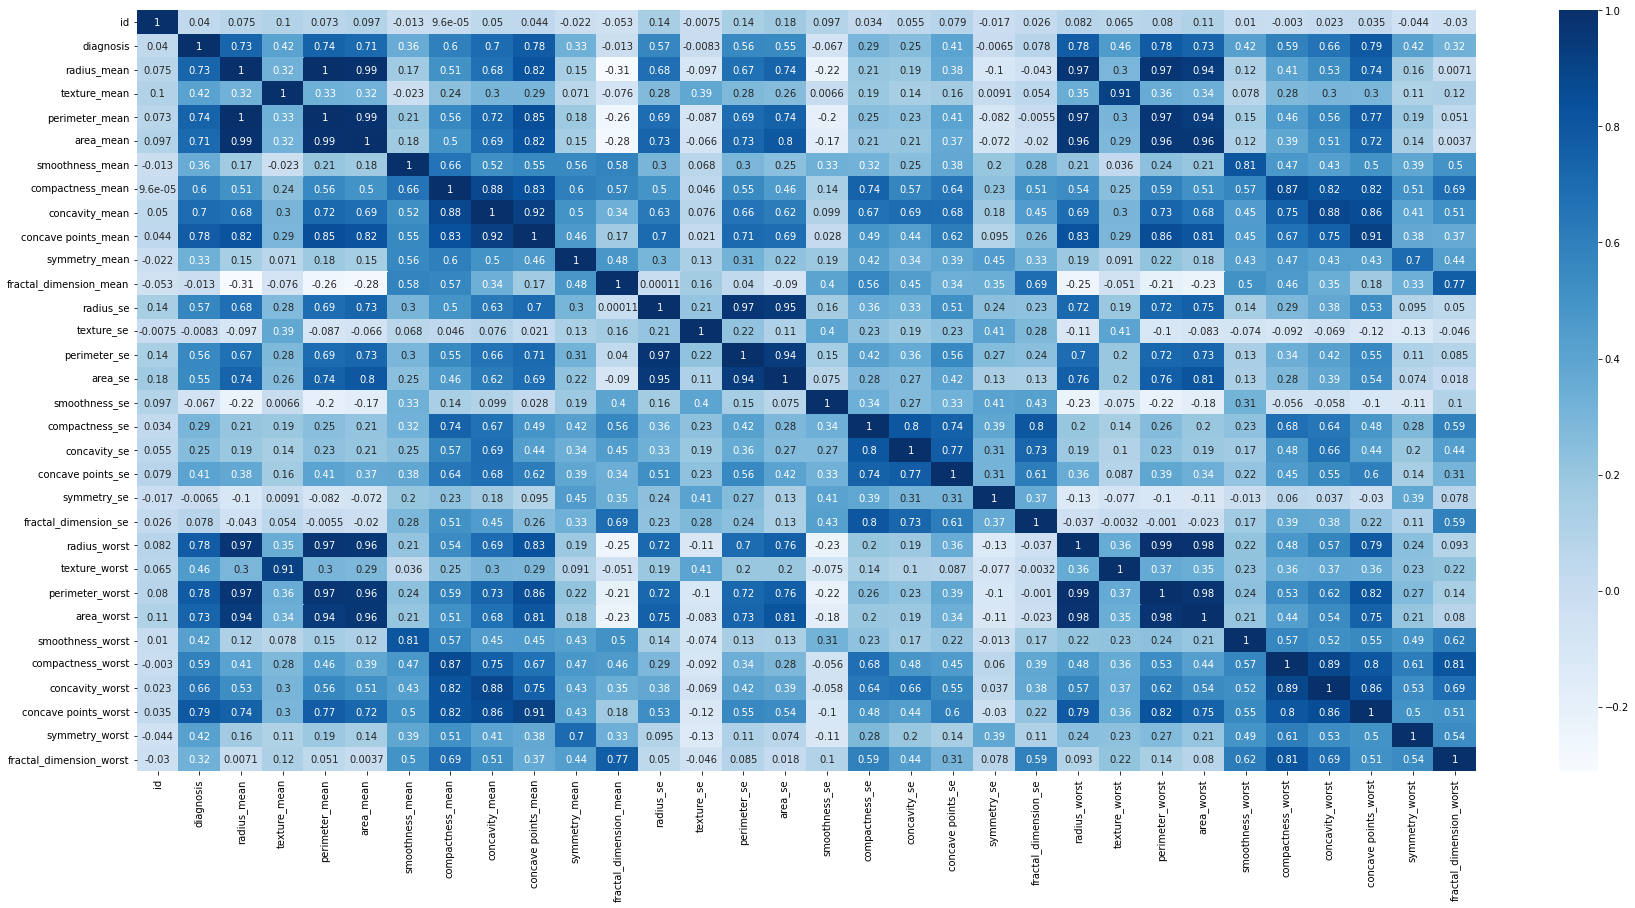

In [ ]:
plt.figure(figsize=(30,14))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

###**Random Forest Classifier**

Random forest classifier initially selects a random subset of data and generates numerous decision trees. 

It then summarizes the votes from different decision trees and then takes the decision to decide the final classification of the test object.

A single decision tree has more probability to lead to an error, but when many decision trees are involved in the classification process, we observe that the error reduces and accuracy increases. 

The inputs for the random forest algorithm are the n_estimators i.e. Specifies the number of trees we use in the algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
model=RandomForestClassifier(n_estimators=100)
x=df.drop(['diagnosis','id'],axis=1)
y=df['diagnosis']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)

##**Results of Random Forest Classifier**

In [ ]:
print("model: ",model)
print("accuracy :",round(accuracy_score(y_pred,ytest),2))
print ("precision :",round(precision_score(y_pred,ytest),2))
print("recall: ",round(recall_score(y_pred,ytest),2))
print("f1 : ",round(f1_score(y_pred,ytest),2))

model:  RandomForestClassifier()
accuracy : 0.96
precision : 0.93
recall:  0.98
f1 :  0.95


In [ ]:
kf = KFold(n_splits=5, random_state=None)
f1scores = []
for train_index, test_index in kf.split(x):
  x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
  y_train , y_test = y[train_index] ,y[test_index]
  model.fit(x_train,y_train)
  pred_values = model.predict(x_test)
  f1sc = f1_score(y_test, pred_values)
  f1scores.append(f1sc)
avg_score = sum(f1scores)/5

print('f1 score of each fold - {}'.format(f1scores))
print('Avg f1 score : {}'.format(avg_score))


f1 score of each fold - [0.9218749999999999, 0.9072164948453607, 0.961038961038961, 0.9333333333333333, 0.9454545454545454]
Avg f1 score : 0.9337836669344401


##**Final results and conclusion**

After considering the accuracies of all the models Random Forest works the best